In [34]:
# Imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.decomposition import NMF
from sklearn.metrics import r2_score
from collections import defaultdict

%matplotlib inline

plt.style.use('seaborn')

In [3]:
# Get data as dataframe
books = pd.read_pickle('../data/books.pkl')
titles = pd.read_pickle('../data/titles91.pkl')

In [5]:
books.head(1).T

,0
title,Beware Of Chicken
warning,
summary,Jin Rou wanted to be a cultivator who defie...
ch1,Beware of Chicken In which a transmigrator ...
ch2,I jolted awake to Big D’s furious battle cr...
ch3,Bi De knew fury. One of the red ones had ve...
ch4,There were many ways Meiling expected her d...
ch5,Jin surely could have left first thing in t...


In [7]:
titles.head(1)

,title,tags,followers,rating,pages,views,chapters,date_last_updated,adventure,comedy,...,opera,technologically,first,contact,reader,interactive,short,story,hard,sports
0,Beware Of Chicken,"[adventure, comedy, fantasy, romance, male, ma...",13806,4.83,476,2623581,68,2021-03-29,1,1,...,0,0,0,0,0,0,0,0,0,0


In [95]:
# Get columns for all data 
titles.columns

Index(['title', 'tags', 'followers', 'rating', 'pages', 'views', 'chapters',
       'date_last_updated', 'adventure', 'comedy', 'fantasy', 'romance',
       'male', 'martial', 'arts', 'portal', 'isekai', 'reincarnation',
       'xianxia', 'mystery', 'sci-fi', 'anti-hero', 'genetically',
       'engineered', 'loop', 'strong', 'super', 'heroes', 'time', 'travel',
       'action', 'high', 'litrpg', 'mythos', 'progression', 'ruling', 'class',
       'strategy', 'horror', 'female', 'magic', 'historical', 'urban',
       'villainous', 'drama', 'multiple', 'characters', 'non-human',
       'supernatural', 'gamelit', 'psychological', 'grimdark', 'cyberpunk',
       'satire', 'virtual', 'reality', 'tragedy', 'attractive', 'mc', 'low',
       'secret', 'identity', 'slice', 'life', 'war', 'military', 'wuxia',
       'artificial', 'intelligence', 'dystopia', 'post', 'apocalyptic',
       'dungeon', 'gender', 'bender', 'soft', 'school', 'harem',
       'contemporary', 'steampunk', 'space', 'opera',

In [96]:
books.columns

Index(['title', 'warning', 'summary', 'ch1', 'ch2', 'ch3', 'ch4', 'ch5'], dtype='object')

In [97]:
# Combine data set 
df = pd.merge(left = titles, right = books, left_on='title', right_on='title')

In [108]:
# Create new columns called day last update 
pd.Timestamp.now() - df.date_last_updated

0       3 days 08:46:45.708038
1       5 days 08:46:45.708038
2       5 days 08:46:45.708038
3       3 days 08:46:45.708038
4       6 days 08:46:45.708038
                 ...          
2562    3 days 08:46:45.708038
2563   31 days 08:46:45.708038
2564   12 days 08:46:45.708038
2565    3 days 08:46:45.708038
2566    8 days 08:46:45.708038
Name: date_last_updated, Length: 2567, dtype: timedelta64[ns]

In [107]:
pd.Timestamp.now()

Timestamp('2021-04-01 08:46:30.024539')

---
---

In [83]:
drop_from_X = ['rating', 'tags', 'title', 'date_last_updated'] #, 'followers', 'views']
X = titles.drop(drop_from_X, axis = 1)
y = titles['rating']

# Build model only on title data frame 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [84]:
X_train

,followers,pages,views,chapters,adventure,comedy,fantasy,romance,male,martial,...,opera,technologically,first,contact,reader,interactive,short,story,hard,sports
1533,3,7,749,24,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2095,1,16,30,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2309,0,9,49,1,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
125,514,1820,109074,39,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1377,3,194,1670,21,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,19,263,2204,21,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1731,3,161,1109,25,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
763,41,137,8367,36,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
835,75,1163,35864,149,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
# Make a model and predict 
model_rfrtitle = RandomForestRegressor()
model_rfrtitle.fit(X_train, y_train)
pred = model_rfrtitle.predict(X_test)

In [86]:
r2_score(y_test, pred) 

0.4544537654503933

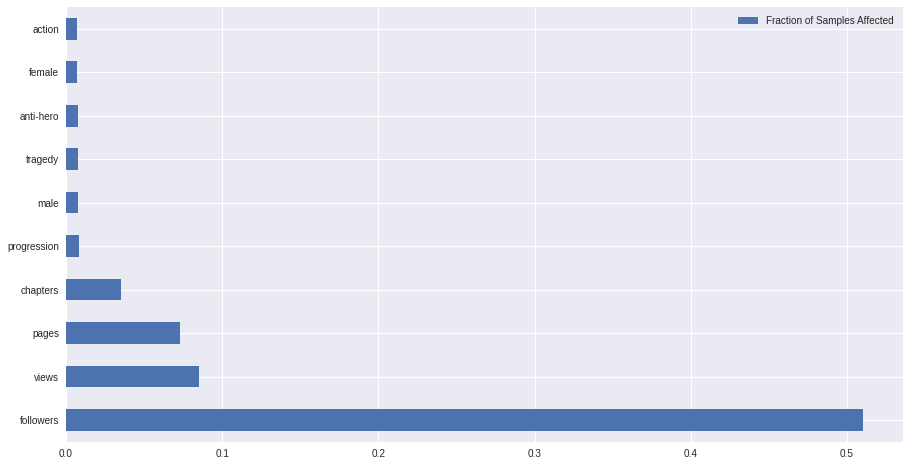

In [75]:
# Plot the feature importance
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : model_rfrtitle.feature_importances_},
                           index=X_train.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected', ascending = False)[0:10]
feat_scores.plot(kind='barh', figsize=(15,8));

In [74]:
names = X_train.columns
 
rfcv = RandomForestRegressor()
scores = defaultdict(list)
 
# crossvalidate the scores on a number of 
# different random splits of the data
splitter = ShuffleSplit(100, test_size=.3)

for train_idx, test_idx in splitter.split(X_train, y_train):
    X_traincv, X_testcv = X_train.values[train_idx], X_train.values[test_idx]
    y_traincv, y_testcv = y_train.values[train_idx], y_train.values[test_idx]
    rfcv.fit(X_traincv, y_traincv)
    
    acc = r2_score(y_testcv, rfcv.predict(X_testcv))
    for i in range(X.shape[1]):
        X_t = X_testcv.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(y_testcv, rfcv.predict(X_t))
        scores[names[i]].append((acc-shuff_acc)/acc)

score_series = pd.DataFrame(scores).mean()
scores = pd.DataFrame({'Mean Decrease Accuracy' : score_series})

<AxesSubplot:>

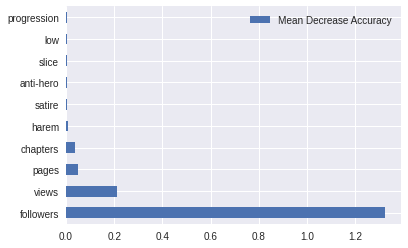

In [92]:
scores.sort_values(by='Mean Decrease Accuracy', ascending = False)[0:10].plot(kind='barh', figsize=(6,4))

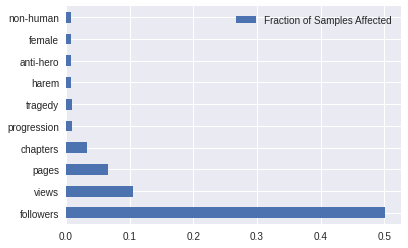

In [94]:
# Plot the feature importance
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : rfcv.feature_importances_},
                           index=X_train.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected', ascending = False)[0:10]
feat_scores.plot(kind='barh', figsize=(6, 4));

In [36]:
rf.feature_importances_

array([0.1604825 , 0.29313497, 0.01414813, 0.00867586, 0.00919709,
       0.01280636, 0.01573495, 0.00399258, 0.003983  , 0.00525353,
       0.00575431, 0.01039919, 0.00398862, 0.00961471, 0.01153965,
       0.01400571, 0.00277835, 0.00274432, 0.00122978, 0.01188633,
       0.00281612, 0.00262984, 0.00245794, 0.0021222 , 0.01358447,
       0.01287403, 0.0153726 , 0.00682887, 0.01120827, 0.00474215,
       0.00444353, 0.00727947, 0.00588413, 0.01404833, 0.01456152,
       0.00557426, 0.00909675, 0.00544579, 0.00901737, 0.00762323,
       0.00719728, 0.01147907, 0.0120918 , 0.0121632 , 0.00897296,
       0.01056679, 0.00122368, 0.00437868, 0.00237381, 0.00265311,
       0.01369207, 0.00272259, 0.00264872, 0.00900041, 0.00500686,
       0.00573251, 0.00661582, 0.00914182, 0.00630896, 0.0048202 ,
       0.00363217, 0.0020605 , 0.00184897, 0.01021204, 0.00434614,
       0.00384248, 0.00683649, 0.00163887, 0.00228424, 0.00709737,
       0.0069274 , 0.00720372, 0.00809833, 0.0021805 , 0.00238

In [87]:
r2_score(y_test, pred)

0.4544537654503933

In [44]:
y_test

924     5.00
2198    0.00
2496    3.97
156     4.49
1116    4.67
        ... 
477     4.61
2439    4.69
2181    0.00
536     4.83
1959    0.00
Name: rating, Length: 520, dtype: float64